In [1]:
import numpy as np
import operator
import os,sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# TensorFlow and tf.keras
import tensorflow as tf


In [2]:
#Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [3]:
per_call_df = pd.read_csv('/Users/benjaminmanning/Desktop/PAE/github/data/per_call_df.csv')
#per_call_df = per_call_df.sort_values(by='call_time', ascending=False)

In [4]:
per_call_df.head()

,callId,noCallsMade,noContentListened,caller_lifetime,day,month,year,last_day,last_month,last_year,n,con_play,con_replay,adjusted_con,depth,content,call_time
0,0000ff93-9cd5-4b9a-bba1-eef70fcbd74b,14,75,0.583,1,8,2019.667,12,3,2020.250,7,0,0,0,7,0,47
1,00076a1a-760b-46b8-baf9-bf5752096ef3,45,52,3.583,28,7,2016.583,12,2,2020.167,30,6,2,4,30,1,436
2,000ebd4c-80ca-4251-b99a-a9c88d627f47,14,60,0.250,3,12,2020.000,7,3,2020.250,8,1,0,1,8,1,83
3,0010440f-f3e3-4c1a-aa6a-b2ffeff505e3,49,105,3.417,30,10,2016.833,28,3,2020.250,10,0,0,0,10,0,67
4,0015dc69-4442-48e1-8208-d31acb2ab398,62,76,2.750,30,6,2017.500,13,3,2020.250,14,2,0,2,14,1,149


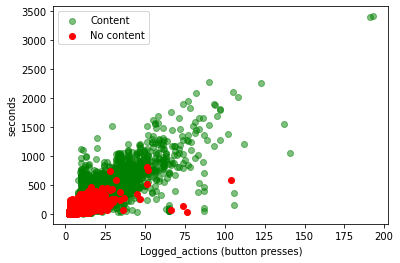

In [4]:
no_content = per_call_df[per_call_df['content']==0]
content = per_call_df[per_call_df['content']==1]
plt.scatter(content['depth'], content['call_time'], c='g', alpha = .5,label = 'Content')
plt.scatter(no_content['depth'], no_content['call_time'], c='r',label = 'No content')
plt.xlabel('Logged_actions (button presses)')
plt.ylabel('seconds')
plt.legend()


In [19]:
x = per_call_df[['call_time','caller_lifetime', 'depth','year','day','noCallsMade', 'last_year','noContentListened']]
y = per_call_df['content']

##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8,random_state=109)
x_train_int = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(x_train)
x_test_int = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(x_test)



#x_train = x_train.sort_values(by='call_time')
#x_test = x_test.sort_values(by='call_time')


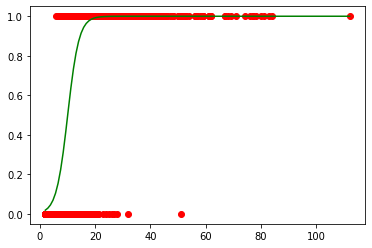

In [46]:
#model = LogisticRegression(penalty='none', max_iter=10000)
x_values = pd.DataFrame(np.linspace(2,112, 120))
model = model.fit(x_train[['depth']], y_train)
y_pred_test = model.predict_proba(x_values)[:,1]
x_values = np.linspace(2,112, 120)
plt.scatter(x_test['depth'],y_test, c='r')
plt.plot(x_values,y_pred_test, c='g')


The test accuracy is  0.904
The train accuracy is  0.897


Text(0, 0.5, 'button presses')

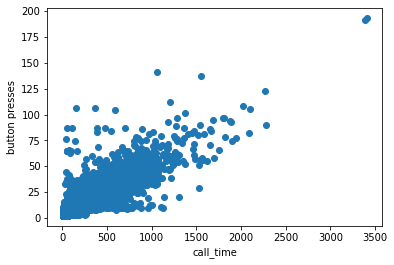

In [15]:
## Report the $MSE$ and $R^2$ from the training and test sets.

# Test MSE and R-squared

test_accuracy = model.score(x_test_int, y_test)
print(f'The test accuracy is {test_accuracy: .3f}')
#print(f"The R-squared for the test data is {r2_score(y_test, y_pred_test): .3f}")

# Train MSE and R-squared
train_accuracy = model.score(x_train_int, y_train)
print(f'The train accuracy is {train_accuracy: .3f}')
#print(f"The R-squared for the training data is {r2_score(y_train, y_pred_train): .3f}")
plt.scatter(x['call_time'],x['depth'])
plt.xlabel('call_time')
plt.ylabel('button presses')

In [8]:
#getting the c values
C_list = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]
val_list = []
train_list = []

#cross validating over C values
for C in C_list:
    #fit the model
    logit_lasso = LogisticRegression(C=C, penalty='l1', solver='liblinear', max_iter=5000)
    cv_accuracy = cross_validate(logit_lasso, x_train_int, y_train, cv=3, scoring="accuracy", return_train_score=True)
    
    #get the accuracies
    val_list.append((abs(cv_accuracy['test_score'])).mean())
    train_list.append((abs(cv_accuracy['train_score'])).mean())

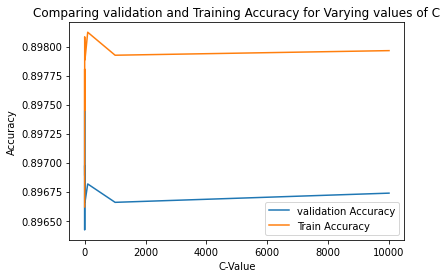

In [9]:
#plotting the accuracies
plt.plot(C_list,val_list, label = 'validation Accuracy')
plt.plot(C_list,train_list, label = 'Train Accuracy')
plt.xlabel("C-Value")
plt.ylabel("Accuracy")
plt.title('Comparing validation and Training Accuracy for Varying values of C')
plt.legend()

Text(0.5, 0, 'predicted outcome probability')

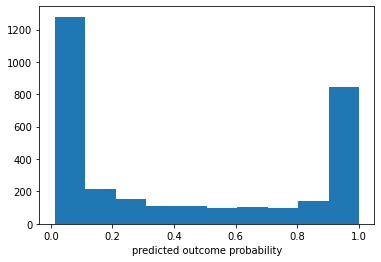

In [70]:
plt.hist(y_pred_test)
plt.xlabel('predicted outcome probability')

In [176]:
model = tf.keras.models.Sequential(name='FCN')

n_hidden = 50

# The number of nodes in the input layer (features)
n_input = 21

# The number of nodes in the output layer
n_output = 1

#regularizer

model.add(tf.keras.layers.Dense(n_hidden, kernel_regularizer='l2', activation='relu', input_dim=n_input, name='hidden_1'))
model.add(tf.keras.layers.Dense(n_hidden, kernel_regularizer='l2', activation='relu', input_dim=n_hidden, name='hidden_2'))
model.add(tf.keras.layers.Dense(n_hidden, kernel_regularizer='l2', activation='relu', input_dim=n_hidden, name='hidden_3'))

model.add(tf.keras.layers.Dense(n_output, activation = 'sigmoid',bias_regularizer='l1', name='output'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [177]:
# compile it and run it
history = model.fit(x_train.values,y_train.values, epochs=20,verbose=0, validation_split=.2)

Text(0.5, 0.98, 'NN_model Training')

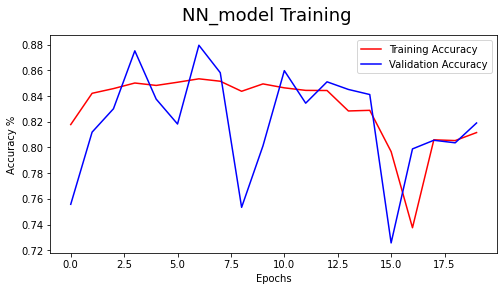

In [178]:
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(history.history['accuracy'],'r',label = 'Training Accuracy')
ax.plot(history.history['val_accuracy'],'b',label = 'Validation Accuracy')
ax.legend()
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy %');
fig.suptitle('NN_model Training', fontsize = 18)

In [179]:
depths = list(range(1, 25))

def calc_meanstd(X_train, y_train,X_test,y_test, depths):
    # your code here
    
    #initiate the lists
    train_scores = []
    cvmeans = []
    cvstds = []
    test_scores = []
    
    #Iterate through the depths
    for d in depths:
        #Initialize the Decision tree model and fit the training data
        model1_1 = DecisionTreeClassifier(max_depth=d).fit(X_train,y_train)
        #Append the training scores without cross_validation
        train_scores.append(model1_1.score(X_train,y_train))
        test_scores.append(model1_1.score(X_test,y_test))
        
        
        #Repeat with Cross Validation
        scores = cross_val_score(estimator = model1_1, X=X_train, y=y_train, cv=5)
        cvmeans.append(scores.mean())
        cvstds.append(scores.std())
    
    # end of your code here
    return cvmeans, cvstds, train_scores, test_scores

cvmeans, cvstds, train_scores, test_scores= calc_meanstd(x_train_int, y_train,x_test_int,y_test, depths)

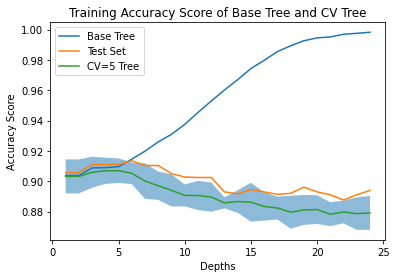

In [180]:
plt.plot(depths, train_scores, label = "Base Tree")
plt.plot(depths, test_scores, label = "Test Set")
plt.plot(depths, cvmeans, label = "CV=5 Tree")
plt.fill_between(depths, np.array(cvmeans) + 2*np.array(cvstds), np.array(cvmeans) - 2*np.array(cvstds), alpha = 0.5)
plt.xlabel("Depths")
plt.ylabel("Accuracy Score")
plt.title("Training Accuracy Score of Base Tree and CV Tree")
plt.legend()

In [183]:
n_estimators = 75
tree_depth = 30

test_score = []
train_score =[]
cv_score = []
cvstds = []
depths = []

for i in range(tree_depth):
    depths.append(i)
    #Initiatilze and fit the Random Forest Classifier model
    model3_1 = RandomForestClassifier(n_estimators = n_estimators, max_depth = i+1, max_features = 'sqrt')
    model3_1.fit(x_train_int,y_train)

    #train score:
    random_forest_train_score = model3_1.score(x_train_int,y_train)
    train_score.append(random_forest_train_score)

    #test score:
    random_forest_test_score = model3_1.score(x_test_int,y_test)
    test_score.append(random_forest_test_score)
    
    #CV
    scores = cross_val_score(estimator = model3_1, X=x_train_int, y=y_train, cv=3)
    cv_score.append(scores.mean())
    cvstds.append(scores.std())

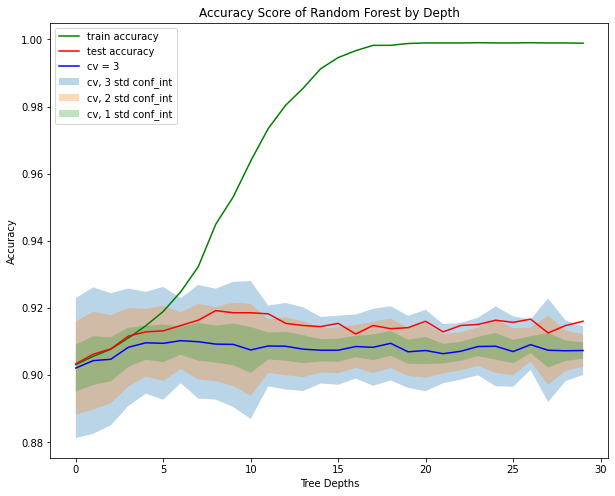

In [193]:
plt.subplots(figsize=(10,8))
plt.plot(depths,train_score, c='g',label='train accuracy')
plt.plot(depths,test_score, c='r',label='test accuracy')
plt.plot(depths,cv_score, c='b',label='cv = 3')
plt.fill_between(depths, np.array(cv_score) + 3*np.array(cvstds), np.array(cv_score) - 3*np.array(cvstds), alpha = 0.3,label = 'cv, 3 std conf_int')
plt.fill_between(depths, np.array(cv_score) + 2*np.array(cvstds), np.array(cv_score) - 2*np.array(cvstds), alpha = 0.3,label = 'cv, 2 std conf_int')
plt.fill_between(depths, np.array(cv_score) + np.array(cvstds), np.array(cv_score) - np.array(cvstds), alpha = 0.3,label = 'cv, 1 std conf_int')
plt.xlabel("Tree Depths")
plt.ylabel("Accuracy")
plt.title("Accuracy Score of Random Forest by Depth")
plt.legend()

In [17]:
model_rf = RandomForestClassifier(n_estimators = 75, max_depth = 7, max_features = 'sqrt')
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=75)

In [39]:
from collections import Counter
top_predictors_rf = []
for i in range (75):
    top_predictors_rf.append(model_rf.estimators_[i].tree_.feature[0])
    
top_predictors_rf = pd.Series(top_predictors_rf)


#Use name of predictor instead of index
print("The top predictors for random forest is", x_train.columns[top_predictors_rf].values)

c = Counter(x_train.columns[top_predictors_rf].values)

print(c.most_common(6))

The top predictors for random forest is ['call_time' 'noCallsMade' 'call_time' 'depth' 'noCallsMade'
 'caller_lifetime' 'noCallsMade' 'call_time' 'year' 'depth' 'call_time'
 'year' 'noCallsMade' 'caller_lifetime' 'depth' 'call_time' 'call_time'
 'depth' 'noCallsMade' 'call_time' 'year' 'year' 'depth' 'call_time'
 'caller_lifetime' 'depth' 'call_time' 'noCallsMade' 'depth' 'year'
 'caller_lifetime' 'noCallsMade' 'depth' 'call_time' 'depth' 'year'
 'depth' 'depth' 'noCallsMade' 'depth' 'call_time' 'noCallsMade'
 'call_time' 'caller_lifetime' 'call_time' 'depth' 'noCallsMade' 'depth'
 'depth' 'call_time' 'call_time' 'depth' 'call_time' 'call_time'
 'call_time' 'caller_lifetime' 'depth' 'noCallsMade' 'call_time'
 'caller_lifetime' 'depth' 'call_time' 'call_time' 'caller_lifetime'
 'caller_lifetime' 'call_time' 'depth' 'call_time' 'noCallsMade' 'depth'
 'caller_lifetime' 'caller_lifetime' 'depth' 'call_time' 'depth']
[('call_time', 24), ('depth', 22), ('noCallsMade', 12), ('caller_lifetime'

In [225]:
##GET POSITIVE AND NEGATIVE ACCURACIES

model_rf = RandomForestClassifier(n_estimators = n_estimators, max_depth = 6, max_features = 'sqrt')
model_rf.fit(x_train,y_train)

y_test_pos = y_test[y_test==1]
x_test_pos = x_test.loc[y_test[y_test==1].index]

y_test_neg = y_test[y_test==0]
x_test_neg = x_test.loc[y_test[y_test==0].index]

model_rf.score(x_test_pos,y_test_pos), model_rf.score(x_test_neg,y_test_neg)





(0.9431137724550899, 0.885227896760022)

In [152]:
#getting k values
k_list = [1,3,5,9,15,21,51,71,101]
val_list = []
train_list = []

#running CV over the k values
for k in k_list:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_accuracy = cross_validate(knn_model, x_train, y_train, cv=5, scoring="accuracy", return_train_score=True)
    
    # Calculate MSE on both the test and training set for the model
    val_list.append((abs(cv_accuracy['test_score'])).mean())
    train_list.append((abs(cv_accuracy['train_score'])).mean())


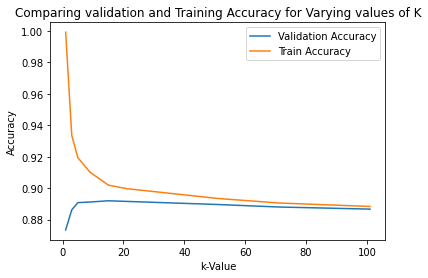

In [153]:
#plotting the training versus the validation accuracy
plt.plot(k_list,val_list, label = 'Validation Accuracy')
plt.plot(k_list,train_list, label = 'Train Accuracy')
plt.xlabel("k-Value")
plt.ylabel("Accuracy")
plt.title('Comparing validation and Training Accuracy for Varying values of K')
plt.legend()